In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate


def zcsequence(u, seq_length, q=0):
    """
    Generate a Zadoff-Chu (ZC) sequence.

    Parameters
    ----------
    u : int
        Root index of the the ZC sequence: u>0.

    seq_length : int
        Length of the sequence to be generated. Usually a prime number:
        u<seq_length, greatest-common-denominator(u,seq_length)=1.

    q : int
        Cyclic shift of the sequence (default 0).

    Returns
    -------
    zcseq : 1D ndarray of complex floats
        ZC sequence generated.
    """

    for el in [u, seq_length, q]:
        if not float(el).is_integer():
            raise ValueError("{} is not an integer".format(el))
    if u <= 0:
        raise ValueError("u is not stricly positive")
    if u >= seq_length:
        raise ValueError("u is not stricly smaller than seq_length")
    if np.gcd(u, seq_length) != 1:
        raise ValueError("the greatest common denominator of u and seq_length is not 1")

    cf = seq_length % 2
    n = np.arange(seq_length)
    zcseq = np.exp(-1j * np.pi * u * n * (n + cf + 2.0 * q) / seq_length)

    return zcseq

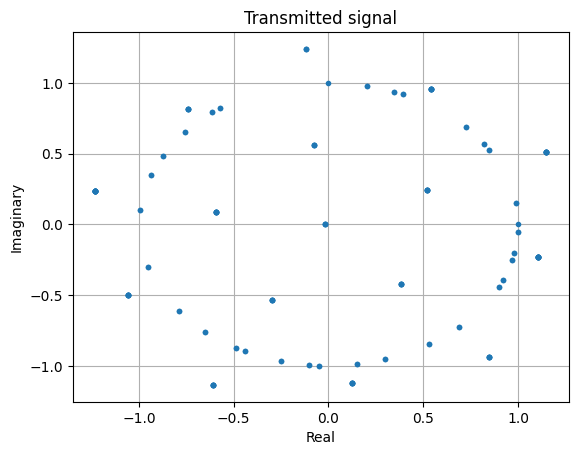

In [10]:
# 示例设置
u = 5
zc_length = 62
message_length = 100
snr_dB = 20  # 信噪比(dB)

# 生成 ZC 序列
zc_seq = zcsequence(u, zc_length)

# 生成 16-QAM 信号
# Read the constellation points from the txt file
tx_read = np.loadtxt(f"./16qam_constellation.txt")
# Extract the real and imaginary parts
tx_constellation = tx_read[:, 0] + 1j * tx_read[:, 1]

# Normalize the constellation
tx_constellation = tx_constellation / np.sqrt(np.mean(np.abs(tx_constellation) ** 2))

# Generate the message
message = np.random.randint(0, 16, message_length)
qam_signal = tx_constellation[message]

# 归一化 ZC 序列
normalized_zc_seq = zc_seq / np.sqrt(np.mean(np.abs(zc_seq) ** 2))

# 将归一化后的 ZC 序列添加到 16-QAM 信号中
transmitted_signal = np.concatenate([normalized_zc_seq, qam_signal])

# write the transmitted signal to a dat file
with open("./file/tx.dat", "wb") as f:
    f.write(transmitted_signal.tobytes())